In [ ]:
import os

import pandas as pd
# Plotting libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

# User defined files and classes
from ReLMM.read_data import Inputs
import ReLMM.utils_dataset as utilsd
from ReLMM.soa_feature_selectors import SOAFeatureSelectors

# Tick parameters
# Plotting parameters
plt.rcParams.update({
"text.usetex":True,
"font.family":"serif",
"font.serif":["Computer Modern Roman"]})
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['ytick.minor.width'] = 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Reading data for the input dataset type:  SynthData
Training score:  0.915515270318871
Mean cross-validation score: 0.04
MSE: 0.8
RMSE: 0.89


/Users/nikhilthota/miniconda3/envs/ReLMM/lib/python3.11/site-packages/ReLMM/soa_feature_selectors.py:101: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(descriptors)


{'z1': 0.2096165418624878, 'z2': 0.3592085540294647, 'z3': 0.4838569164276123, 'z4': 0.4893328845500946, 'z5': 0.7835375070571899, 'z6': 0.7459052801132202, 'z7': 0.681554913520813, 'z8': 0.744161069393158, 'f1': 1.0702840089797974, 'f2': 1.6598374843597412, 'f3': 1.75660240650177, 'f4': 1.0361591577529907}
0.7972167126904901
{'z1': 0.17187835847755883, 'z2': 0.046996105865269484, 'z3': 0.05368852939900699, 'z4': 0.0, 'z5': 0.11371604930050605, 'z6': 0.0, 'z7': 0.07683865956648922, 'z8': 0.0, 'f1': 0.0, 'f2': 0.12099445462887216, 'f3': 0.34591752000330817, 'f4': 0.13980310031077384}
0.6313203767168281


/Users/nikhilthota/miniconda3/envs/ReLMM/lib/python3.11/site-packages/ReLMM/soa_feature_selectors.py:137: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(descriptors)


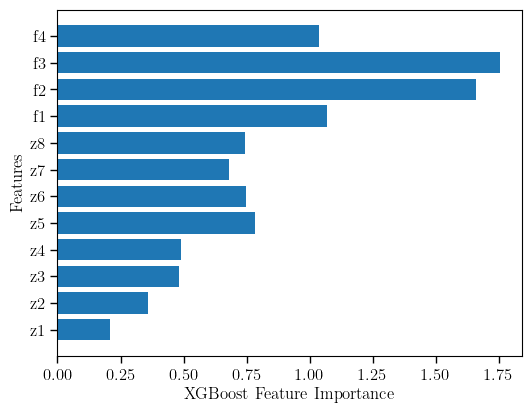

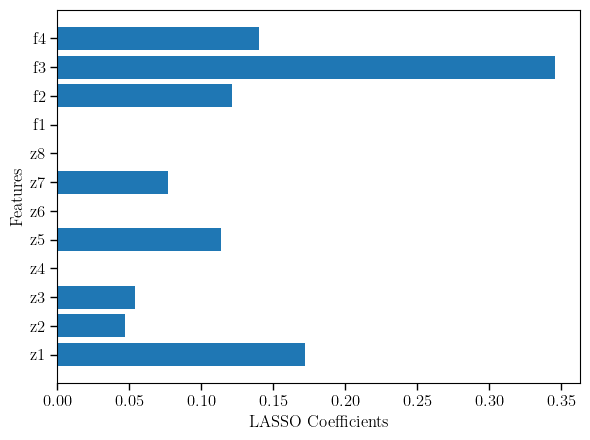

In [ ]:
input_type='SynthData'
input_path='../synthetic_dataset'
input_file='synthetic_data_randomSamples_200_nonlinearf5.csv' 
output_dir='../output'
file_name_prefix=input_file.split('.csv')[0] 

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

input_data = Inputs(input_type=input_type,
                    input_path=input_path,
                    input_file=input_file)

x_data, y_data, descriptors = input_data.read_inputs()
x_stand_DT, x_stand_DT_df, scalerX = utilsd.standardize_data(x_data)
y_stand_DT, y_stand_DT_df, scalerY = utilsd.standardize_data(pd.DataFrame({'target':y_data[:,0]}))

methods = SOAFeatureSelectors(x_stand_DT, y_stand_DT, test_size=0.1, random_state=40)

feature_importance_dict_xgboost, importance_df_xgboost, mse_test_xgboost = methods.xgboost(descriptors, save_fig=False, plot_fig=True, fig_name=f'{output_dir}/{file_name_prefix}_xgboost.pdf')
feature_importance_dict_lasso, importance_df_lasso, mse_test_lasso = methods.lasso(descriptors, save_fig=False, plot_fig=True, fig_name=f'{output_dir}/{file_name_prefix}_lasso.pdf')

print(feature_importance_dict_xgboost)
print(mse_test_xgboost)
print(feature_importance_dict_lasso)
print(mse_test_lasso)

# print(f' MSE XGBoost : {mse_test_xgboost}')
# print(f' MSE LASSO : {mse_test_lasso}')
# mse_df = pd.DataFrame([[mse_test_xgboost,mse_test_lasso]],columns=['MSE_xgboost','MSE_lasso'])
# importance_df_xgboost.to_csv(f'{output_dir}/{file_name_prefix}_xgboost.csv')
# importance_df_lasso.to_csv(f'{output_dir}/{file_name_prefix}_lasso.csv')
# mse_df.to_csv(f'{output_dir}/{file_name_prefix}_soa_mse.csv')